# Examen final

## Modelo de abandono

El objetivo consiste en desarrollar un modelo de aprendizaje automático que pueda predecir si un cliente abandona el banco después de 6 meses, dependiendo de los valores de la entidad bancaria de estudio.

### Descripción de los datos

El conjunto de datos contiene 14 columnas. Las 13 primeras columnas corresponden a la variable independiente. y la columna 14 es la variable dependiente.

Los datos de las variables independientes son recopilados 6 meses antes que los datos de la variable dependiente. Lo cual indica predecir si un cliente abandona el banco al cabo de 6 meses. dependiendo de los valores actuales de la entidad bancaria.

Veamos cada una de las columnas:

* **RowNumber (Número de fila)** Corresponde a la numeración de fila en orden ascendente.
* **CustomerId (Id del cliente)** Corresponde al número identificativo del cliente.
* **Surname (Apellido)** Corresponde al apellido del cliente.
* **CreditScore (Puntaje de crédito)** Hace referencia a la puntuación de crédito que posee actualmente el cliente dentro del banco. Una puntuación de crédito alta hace menos probable que abandone el banco.
* **Geography (Geografía)** Corresponde a la ubicación geográfica del cliente, teniendo el banco presencia en países como: Francia, España y Alemania.
* **Gender (Genero)** Hace referencia al sexo del cliente, valores cualitativos (Female and Male)
* **Age (Edad)** Hace referencia a la edad actual en años del cliente.
* **Tenure (Tenencia)** Se refiere al número de años que el cliente ha sido cliente del banco
* **Balance (Balance o saldo)** Hace referencia al saldo actual de la cuenta del cliente
* **NumOfProducts (Numero de productos)** Hace referencia al número de servicios contratados por el banco, e.g. Fondo de pensiones, cartera de inversión, etc.
* **HasCrCard (Tiene tarjeta de crédito)** Hace referencia a que un cliente tiene o no tarjeta de crédito. Cuyos valores son binarios, 1 que si posee tarjeta de crédito y 0 en caso contrario.
* **IsActiveMember (Es miembro activo)** Hace referencia a que tan activo es el cliente en la entidad, este valor es medido de diferente manera en cada entidad. Cuyos valores son binarios, 1 que si es activo y 0 en caso contrario.
* **EstimatedSalary (Salario estimado)** Hace referencia a un calculo aproximado del salario que percibe la persona. Este calculo podria basarse en un promedio que el banco hace de el saldo de ingreso de cada mes.
* **Exited (Salida)** Hace referencia a que si el cliente abandonó o no el banco. Cuyos valores son binarios, 1 que si abandonó y 0 en caso contrario.

#### Importamos las librerias relevantes

Importamos las librerias necesarias de `Python` para crear el algoritmo y en analsis correspondiente

In [52]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import norm, skew
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None

#### Importamos en conjunto de datos

Cargamos el conjunto de datos de entrada en el Notebook de Python, que esta en el mismo directorio actual de trabajo, mediante la libreria `Pandas`

Observamos el conjunto de datos en general y cada columna en detalle para comprender mejor los datos de entrada. Con el cual tenemos una mejor idea que se trata de un conjunto de datos de abandono de clientes de un banco, donde cada registro implica la naturaleza de la suscripción, la tenencia, la edad, geografia, genero, saldo y por supuesto la columna `salida` que hace referencia a la salida o no del banco despues de los 6 meses.

In [53]:
dataset = pd.read_csv("./Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Un método de descripción rapida revela que los clientes del banco se quedan en promedio durante 5 años y un saldo en cuenta de un promedio de 76485.88\$

In [54]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Por su apariencia, podemos suponer que el conjunto de datos contiene varias columnas numéricas y categóricas que proporcionan información diversa sobre el estado de cuenta de cada cliente.

In [55]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

El conjunto de datos contiene 10000 filas y 14 columnas y no faltan valores en el conjunto de datos.

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### Distrubución de la variable objetivo

veamos la distribución de los valores de salida, y si el conjunto de datos mantiene algún problema de desequilibrio de clases. Como se ve a continuación, el conjunto de datos está desequilibrado con una alta proporción de clientes que no abandonaron el banco (0) en comparación con su contraparte.

In [58]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Limpieza del conjunto de datos

Definimos a las 1ras 13 columnas como variables independientes y a la ultima como variable dependiente, es la que se usará para hacer la predicción de que "el usuario dejara o no dejara el banco".

Veamos las columnas que nos sirven para el modelo y descartemos las que no tienen un impacto como datos relevantes para el modelo:

* **RowNumber (Número de fila)** Es un campo no necesario ya que este es netamente un conteo ascendente de los datos
* **CustomerId (Id del cliente)** El ID del cliente no incide en nada al modelo.
* **Surname (Apellido)** Un nombre de cliente no afecta a la desición de salida del banco o no

Entonces, creamos la matriz de caracteristicas y el vector de la variable dependiente

* Matriz de caracteristicas: columnas 3 a la 12
* Vector de la variable dependiente

In [59]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

al tener variables categoricas dentro del conjunto de datos, debemos hacer el procesado de estas en variables dummy (Una columna para cada una de las categorias y en su interior un 0 o 1 respectivamente, si la observación pertenece o no a dicha categoria). Se trata de traducir todo a valores numericos codificando de la forma en la que haga falta. Esto con `LabelEncoder` y `OneHotEncoder` propias de la libreria de `scikit-learn`

In [60]:
# Creamos un labelenconder para cada variable categorica
labelencoder_X1 = LabelEncoder()
X[:, 1] = labelencoder_X1.fit_transform(X[:, 1])
labelencoder_X2 = LabelEncoder()
X[:, 2] = labelencoder_X2.fit_transform(X[:, 2])

In [61]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\Dante\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Crear el conjunto de entrenamiento y de testing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Escalado de variables, esto debido a que existen variables que destacan mucho (tenemos variables que estan entre 0 y 1, otras que llegan a tener valores que llegan a 10000), cada uno esta en una escala diferente, esto para un mejor calculo y hacemos que ninguna variable domine sobre el resto

Entonces ahora estaran estandarizadas X_train, X_test, debidamente normalizadas

In [63]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [64]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

#### Trazamos la matriz de correlación de todas las variables independientes

La matriz nos ayuda a descubrir la relación bivariada entre las variables independientes en un conjunto de datos.

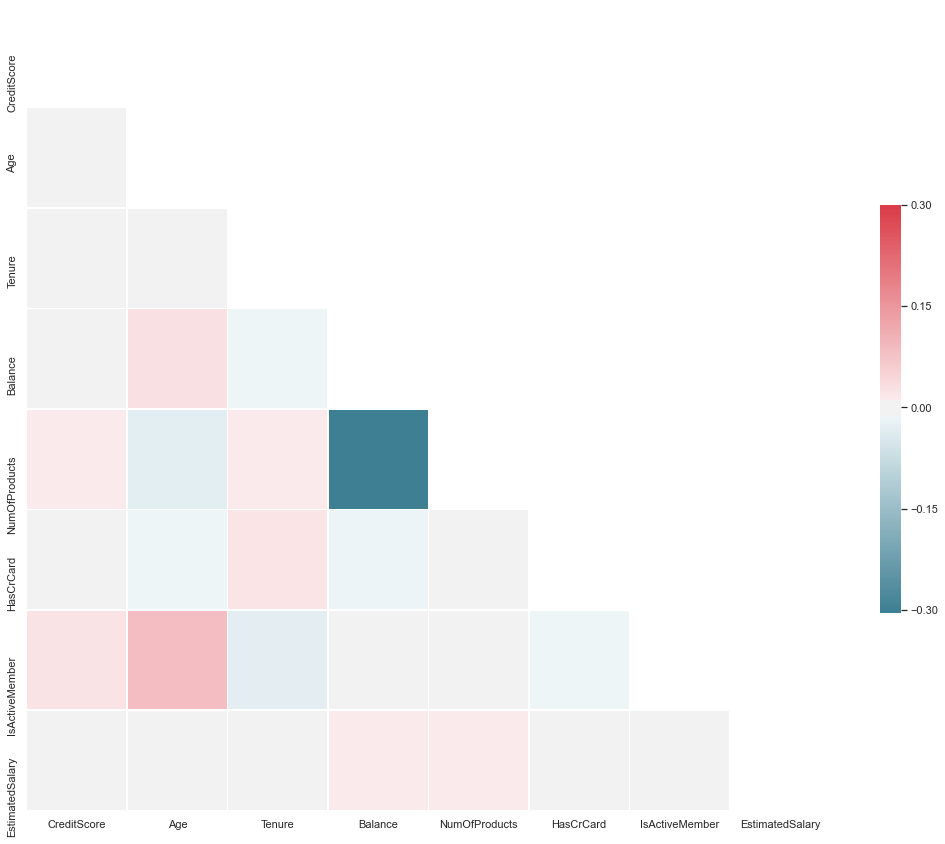

In [65]:
dataset2 = dataset[['CreditScore','Geography', 'Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

sn.set(style="white")
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Analisis

La precisión de la clasificación es una de las métricas de evaluación de clasificación más comunes para comparar algoritmos de línea de base, ya que es el número de predicciones correctas realizadas como una proporción de las predicciones totales.

In [66]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

print (model_results)

           Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Decision Tree     0.802    0.50989  0.57284  0.539535  0.559036


podemos decir que con los arboles de decisión es un modelo con buena exactitud, precisión, recuperación y puntajes F2.

#### Evaluación del modelo

Ajustemos el modelo seleccionado (Arboles de decisión) en el conjunto de datos de entrenamiento y evaluemos los resultados.

**Validación cruzada de k-Fold:** La evaluación del modelo se realiza más comúnmente a través de la técnica de 'Validación cruzada de K-fold' que principalmente nos ayuda a corregir la varianza. El problema de varianza ocurre cuando obtenemos una buena precisión mientras ejecutamos el modelo en un conjunto de entrenamiento y un conjunto de prueba, pero luego la precisión se ve diferente cuando el modelo se ejecuta en otro conjunto de prueba.

Entonces, para solucionar el problema de la varianza, la validación cruzada de k-fold básicamente divide el conjunto de entrenamiento en 10 pliegues y entrena el modelo en 9 pliegues (9 subconjuntos del conjunto de datos de entrenamiento) antes de probarlo en el pliegue de prueba. Esto nos da la flexibilidad de entrenar nuestro modelo en las diez combinaciones de 9 pliegues; dando un amplio espacio para finalizar la variación.

In [67]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Exactitud del arbol de decisión: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Exactitud del arbol de decisión: 0.79 (+/- 0.03)


Por lo tanto, nuestros resultados de validación cruzada de k-veces indican que tendríamos una precisión entre el 76% y el 82% al ejecutar este modelo en cualquier equipo de prueba.

#### Matriz de confusión: 

la matriz de confusión indica que tenemos 233 + 1372 predicciones correctas y 223 + 172 predicciones incorrectas.

* Tasa de precisión = número de predicciones correctas / predicciones totales * 100
* Tasa de error = Número de predicciones incorrectas / predicciones totales * 100

Tenemos una precisión del 80.25%; señalando las características de un modelo razonablemente bueno.

Text(0.5, 8.5, 'Etiqueta predictiva\n')

<Figure size 2016x1440 with 0 Axes>

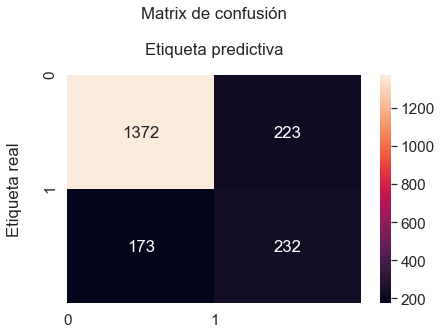

In [69]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Matrix de confusión\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Etiqueta real\n')
plt.xlabel('Etiqueta predictiva\n')